In [8]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import get_plot_data
from plot_utils import get_plot_style
from plot_utils import plot_data

(-0.001, 0.0101)

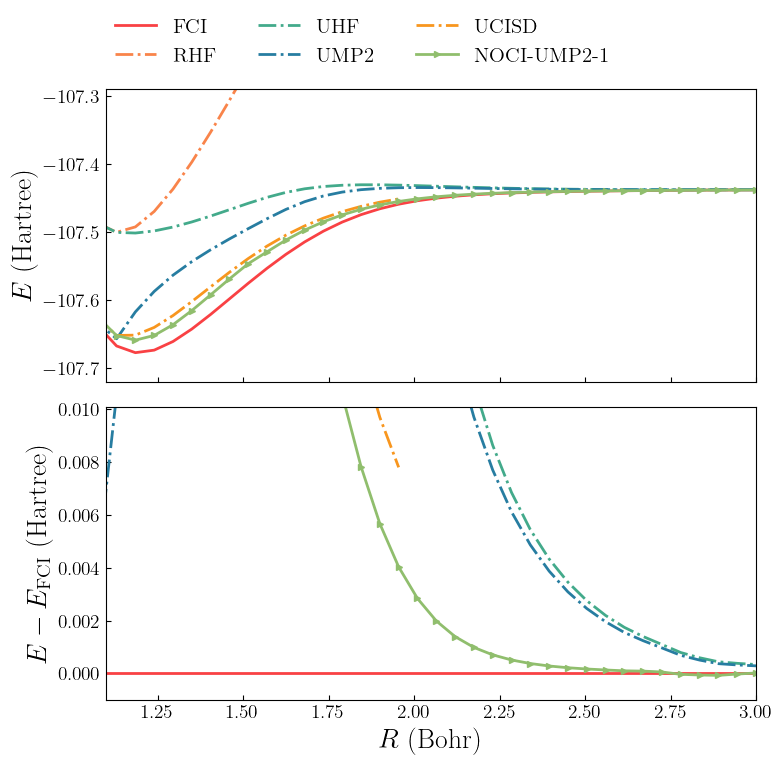

In [9]:
label_list = []
label_list.append("ene_fci")
label_list.append("ene_rhf")
label_list.append("ene_uhf")
label_list.append("ene_ump2")
label_list.append("ene_ucisd")
# label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_1")
# label_list.append("ene_noci_ucisd_1")

data_dict  = get_plot_data("../data/n2-sto-3g.h5")
mask = data_dict["ene_ucisd"][:, 0] > 2.0
data_dict["ene_ucisd"][mask, 1] = numpy.nan

style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.10, 3.00)
axs[0].set_ylim(-107.72, -107.29)
axs[1].set_ylim(-0.001, 0.0101)

(-0.001, 0.0101)

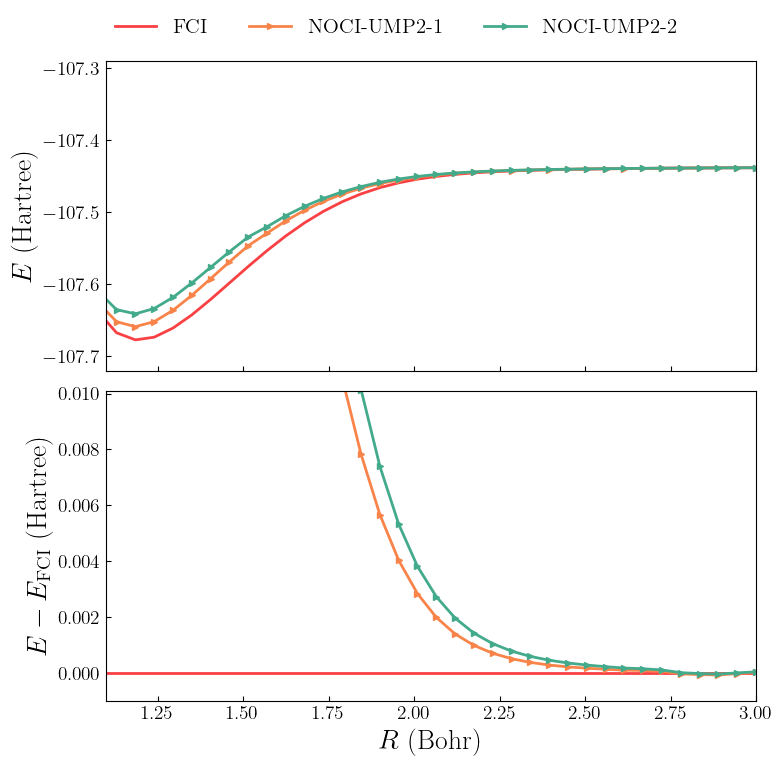

In [10]:
label_list = []
label_list.append("ene_fci")
# label_list.append("ene_rhf")
# label_list.append("ene_uhf")
# label_list.append("ene_ump2")
# label_list.append("ene_ucisd")
# label_list.append("ene_noci_uhf")
# label_list.append("ene_noci_ump2_1")
label_list.append("ene_noci_ump2_1")
label_list.append("ene_noci_ump2_2")
# label_list.append("ene_noci_ucisd_1")
# label_list.append("ene_noci_ucisd_2")

data_dict  = get_plot_data("../data/n2-sto-3g.h5")
mask = data_dict["ene_ucisd"][:, 0] > 2.0
data_dict["ene_ucisd"][mask, 1] = numpy.nan

style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.10, 3.00)
axs[0].set_ylim(-107.72, -107.29)
axs[1].set_ylim(-0.001, 0.0101)

(-0.001, 0.0101)

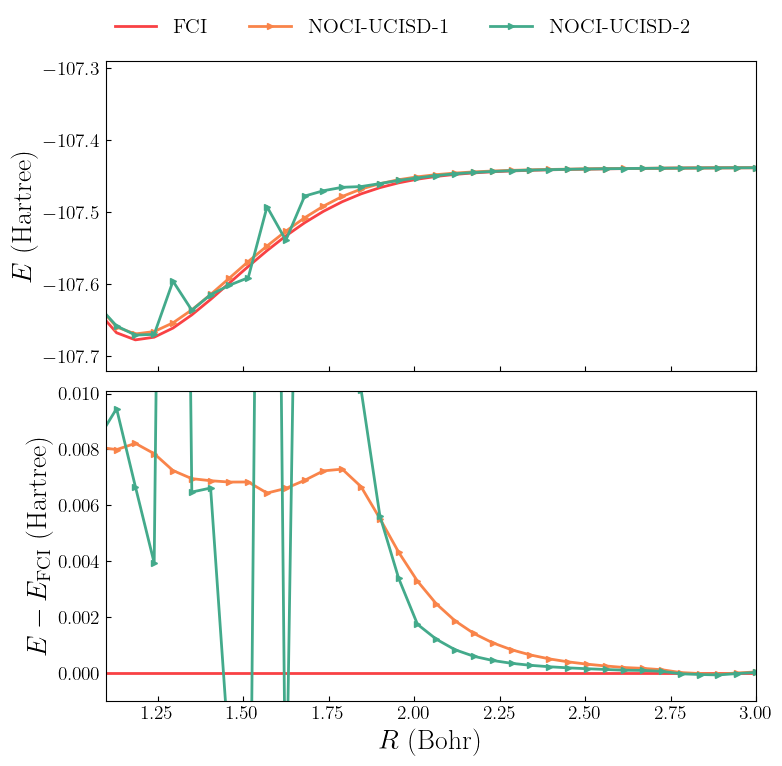

In [11]:
label_list = []
label_list.append("ene_fci")
# label_list.append("ene_rhf")
# label_list.append("ene_uhf")
# label_list.append("ene_ump2")
# label_list.append("ene_ucisd")
# label_list.append("ene_noci_uhf")
# label_list.append("ene_noci_ump2_1")
# label_list.append("ene_noci_ump2_1")
# label_list.append("ene_noci_ump2_2")
label_list.append("ene_noci_ucisd_1")
label_list.append("ene_noci_ucisd_2")

data_dict  = get_plot_data("../data/n2-sto-3g.h5")
mask = data_dict["ene_ucisd"][:, 0] > 2.0
data_dict["ene_ucisd"][mask, 1] = numpy.nan

style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.10, 3.00)
axs[0].set_ylim(-107.72, -107.29)
axs[1].set_ylim(-0.001, 0.0101)